In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile
from io import BytesIO


In [2]:
data = 'ZINC250K'  #choice: ZINC, ZINC250K

In [3]:
if data == 'ZINC':
    file_path = '../moses/dataset/data/ZINC/train.zip'
    with zipfile.ZipFile(file_path, 'r') as zip_ref:    
            file = 'train.csv'
            with zip_ref.open(file) as file:
                # Read the CSV file into a pandas DataFrame
                df= pd.read_csv(BytesIO(file.read()), header=0)

    df['obj'] = 5*df['qed'] - df['SAS']

    print(f'data size: {df.shape[0]}')
    df.shape, df.head()

elif data == 'ZINC250K':
    file_path = '../moses/dataset/data/ZINC250K/train.csv'
    df = pd.read_csv(file_path)

In [4]:
## create dataframe with data for GPR fitting (training)
save_path = '../gpr/optimize_gpr/'
size = 10000
np.random.seed(0)
rand_indices = np.random.choice(len(df), size, replace=False)
gpr_fit_df = df.iloc[rand_indices]
gpr_fit_df.to_csv(f'{save_path}gpr_fit_{data}_df.csv', index=False)

print(f'data size: {gpr_fit_df.shape[0]}')
gpr_fit_df.head()

data size: 10000


,SMILES,SELFIES,logP,qed,SAS,obj
140089,O=C(CCNc1ncccn1)Nc1ccc2c(c1)Cc1ccccc1-2,[O][=C][Branch1][N][C][C][N][C][=N][C][=C][C][...,3.48850,0.587715,2.138418,0.800159
93747,Cc1ccc(Cl)cc1NC(=O)C(c1ccccc1)n1cnnn1,[C][C][=C][C][=C][Branch1][C][Cl][C][=C][Ring1...,2.86302,0.799382,2.598135,1.398777
180647,COc1cccc(CNC(=O)c2ccnc(-c3cccs3)c2)c1,[C][O][C][=C][C][=C][C][Branch2][Ring1][Branch...,3.74870,0.777473,1.938590,1.948774
64526,CCN(CC)S(=O)(=O)N1CCN(CC(F)F)CC1,[C][C][N][Branch1][Ring1][C][C][S][=Branch1][C...,0.45570,0.711810,2.464509,1.094540
19100,COc1cc(CNc2ccc(C#N)cc2)c2c(c1)CC(C)O2,[C][O][C][=C][C][Branch1][#C][C][N][C][=C][C][...,3.50238,0.937331,2.758881,1.927773


In [5]:
test_df = pd.read_csv('../moses/dataset/data/ZINC250K/test.csv')
size = 1000
np.random.seed(0)
rand_indices = np.random.choice(len(test_df), size, replace=False)
gpr_test_df = test_df.iloc[rand_indices]
gpr_test_df.to_csv(f'{save_path}gpr_test_{data}_df.csv', index=False)

print(f'data size: {gpr_test_df.shape[0]}')
gpr_test_df.head()

data size: 1000


,SMILES,SELFIES,logP,qed,SAS,obj
14149,O=C(CNC(=O)c1cc2ccccn2n1)NC1CCCCC1,[O][=C][Branch2][Ring1][Ring2][C][N][C][=Branc...,1.51300,0.898502,2.302828,2.189680
8946,CCN(CCC#N)C(=O)CSc1cc(Cl)ccc1Cl,[C][C][N][Branch1][Branch1][C][C][C][#N][C][=B...,3.84768,0.748676,2.333597,1.409783
22378,CC(C)(C)CC(=O)Nc1cccc(N2CCOC2=O)c1,[C][C][Branch1][C][C][Branch1][C][C][C][C][=Br...,3.01790,0.922808,2.166835,2.447204
12162,CC1(C)COc2ccc(S(N)(=O)=O)cc2NC1=O,[C][C][Branch1][C][C][C][O][C][=C][C][=C][Bran...,0.69110,0.783968,2.476990,1.442849
4879,O=C(Nc1cn[nH]c1)c1ccccc1Cc1ccccc1,[O][=C][Branch1][=Branch2][N][C][C][=N][NH1][C...,3.25280,0.768731,1.948876,1.894781


In [6]:
# calculate the 10th percentile of df['obj]


In [7]:
## create dataframe with data for optimization start points
size = 400
np.random.seed(0)

percentile = np.percentile(gpr_fit_df['obj'], 10)
print(f'10th percentile: {percentile}')

opt_start_df = df[df['obj'] < percentile]

rand_indices = np.random.choice(len(opt_start_df), size, replace=False)
opt_start_df = opt_start_df.iloc[rand_indices]
opt_start_df.to_csv(f'{save_path}opt_start_{data}_10pct_df.csv', index=False)

print(f'data size: {opt_start_df.shape[0]}')
opt_start_df.head()

10th percentile: 0.6982541969049874
data size: 400


,SMILES,SELFIES,logP,qed,SAS,obj
86738,CCOc1ccc(CCCNc2cccc(O)c2)cc1N,[C][C][O][C][=C][C][=C][Branch1][S][C][C][C][N...,3.41780,0.538717,2.007662,0.685921
152978,Cc1nc2c(N(C)Cc3c(C)noc3C)ncnc2o1,[C][C][=N][C][=C][Branch1][P][N][Branch1][C][C...,2.16746,0.722837,2.967067,0.647117
224265,O=C1CC(C(=O)N=c2[nH]c3ccccc3[nH]2)c2ccccc21,[O][=C][C][C][Branch2][Ring1][Ring1][C][=Branc...,2.29350,0.721257,3.284060,0.322227
160969,CCOc1ccc(C(=O)C(C)Sc2nc3ncccn3n2)cc1,[C][C][O][C][=C][C][=C][Branch2][Ring1][#Branc...,2.88650,0.511774,2.787748,-0.228876
190983,Cc1cccc(-n2c3nc(=O)n(C)c(=O)c-3cc3ccccc32)c1,[C][C][=C][C][=C][C][Branch2][Ring1][=C][N][C]...,2.49762,0.506875,2.272292,0.262084


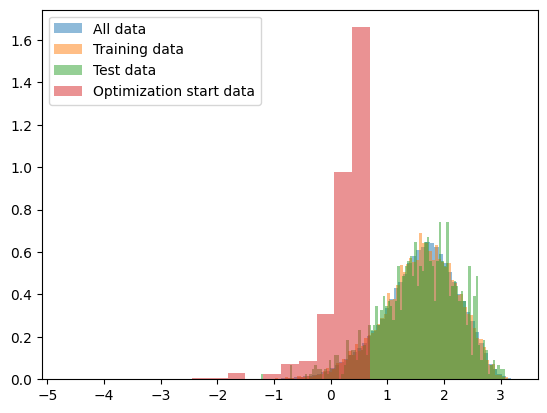

In [8]:
# plot the distribution of objective values of df and gpr_train_df
plt.figure()
plt.hist(df['obj'], bins=100, alpha=0.5, label='All data', density=True)
plt.hist(gpr_fit_df['obj'], bins=100, alpha=0.5, label='Training data', density=True)
plt.hist(gpr_test_df['obj'], bins=100, alpha=0.5, label='Test data', density=True)
plt.hist(opt_start_df['obj'], bins=10, alpha=0.5, label='Optimization start data', density=True)
plt.legend()
plt.show()



In [19]:
import pandas as pd

In [49]:
opt_file_path = r'..\..\NewMoses_results\optimized\vae_property_optimized.csv'
# read the optimized data
df = pd.read_csv(opt_file_path)
df.head()

,SMILES_ini,SELFIES_ini,QED_ini,SA_ini,logP_ini,objective_ini,SMILES,SELFIES,QED,SA,logP,objective,opt_z,pred objective
0,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,[C][C][O][C][=Branch1][C][=O][N][C][C][C][C][N...,0.926272,2.690769,2.23242,1.940592,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,[C][C][O][C][=Branch1][C][=O][N][C][C][C][C][N...,0.926272,2.690769,2.23242,1.940592,[-1.82720216e-03 1.18777053e-02 -4.79100198e-...,1.932384
1,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C(C(C)=O)=C2C)=C1,[C][O][C][=C][C][=C][Branch1][Ring1][O][C][C][...,0.792228,2.261724,3.51654,1.699416,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C3=C2C(C)CC3)=C1,[C][O][C][=C][C][=C][Branch1][Ring1][O][C][C][...,0.799388,3.070773,4.05522,0.926166,[-4.92974855e-02 2.51659807e-02 4.97096106e-...,0.724423
2,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,[C][O][C][=C][C][Branch1][C][C][=N][C][Branch2...,0.795495,2.954142,0.29492,1.023330,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,[C][O][C][=C][C][Branch1][C][C][=N][C][Branch2...,0.795495,2.954142,0.29492,1.023330,[ 1.32764000e-02 5.40873483e-02 9.11794975e-...,0.875701
3,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,[C][N][N][=C][C][=C][Branch1][P][C][=Branch1][...,0.801712,2.365404,3.14640,1.643155,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,[C][N][N][=C][C][=C][Branch1][P][C][=Branch1][...,0.801712,2.365404,3.14640,1.643155,[-5.3267315e-02 2.7872943e-03 5.9131555e-02 ...,0.987491
4,CC(C1=NN=C2N1CCCCC2)N3CCN(C(=O)OC(C)(C)C)CC3,[C][C][Branch1][#C][C][=N][N][=C][N][Ring1][Br...,0.821154,2.927349,2.61820,1.178423,CC1(C(=O)N(C)[NH1]C1)N(CC2CCCN(S(C)(=O)=O)C2C3...,[C][C][Branch1][=N][C][=Branch1][C][=O][N][Bra...,0.754690,4.181506,-0.14230,-0.408057,[ 1.68819297e-02 3.29462551e-02 -4.13166061e-...,0.914636


In [52]:
opt_df = df[['SMILES', 'objective_ini', 'objective', 'pred objective']]
opt_df.head()

# get the index of opt_df which have same objective_ini and objective
idx = opt_df[(opt_df['objective_ini'] == opt_df['objective'])].index
print(f'Number of optimized data with the same initial and optimized objective: {len(idx)}')
print(f'Number of total optimized data: {len(opt_df)}')

opt_df.head()

Number of optimized data with the same initial and optimized objective: 19
Number of total optimized data: 50


,SMILES,objective_ini,objective,pred objective
0,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,1.940592,1.940592,1.932384
1,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C3=C2C(C)CC3)=C1,1.699416,0.926166,0.724423
2,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,1.023330,1.023330,0.875701
3,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,1.643155,1.643155,0.987491
4,CC1(C(=O)N(C)[NH1]C1)N(CC2CCCN(S(C)(=O)=O)C2C3...,1.178423,-0.408057,0.914636


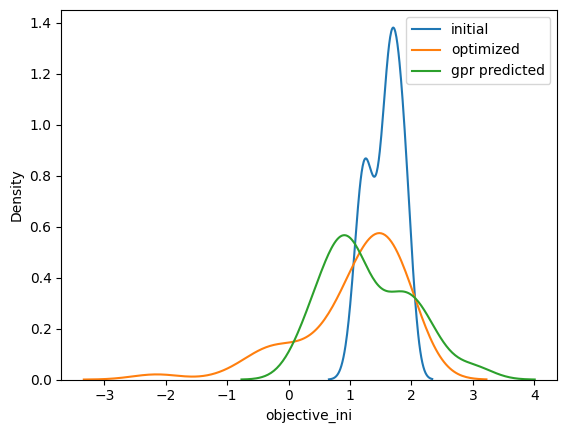

In [51]:
# plot kde of the objective values
import seaborn as sns
plt.figure()
sns.kdeplot(df['objective_ini'], label='initial')
sns.kdeplot(df['objective'], label='optimized')
sns.kdeplot(df['pred objective'], label='gpr predicted')

plt.legend()
plt.show()
